In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys
import time
import warnings
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


In [11]:
train_all = pd.read_csv('train.csv', index_col='id')
test_all = pd.read_csv('test.csv', index_col='id')
len(test_all)

20775

In [3]:
# train_data, valid_data = train_test_split(train_all, test_size=0.2, random_state=42)

# どの特徴が故障に影響しやすいのかを分析する

In [12]:
display(train_all)
display(test_all)

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,I,144.74,material_7,material_5,9,5,0,4,9,18.465,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
47341,I,74.53,material_7,material_5,9,5,4,8,7,18.900,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
47342,I,67.73,material_7,material_5,9,5,10,11,2,18.656,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349


In [13]:
print(train_all['failure'].value_counts() / len(train_all))

0    0.787392
1    0.212608
Name: failure, dtype: float64


In [26]:
all_data = pd.concat([train_all[test_all.columns], test_all], axis=0)

pd.concat([train_all.isna().sum(), test_all.isna().sum()], axis=1)

,0,1
product_code,0,0.0
loading,250,223.0
attribute_0,0,0.0
attribute_1,0,0.0
attribute_2,0,0.0
attribute_3,0,0.0
measurement_0,0,0.0
measurement_1,0,0.0
measurement_2,0,0.0
measurement_3,381,329.0


In [27]:
print(f"{all_data.isna().any(axis=1).sum() / len(all_data):.0%}")

54%


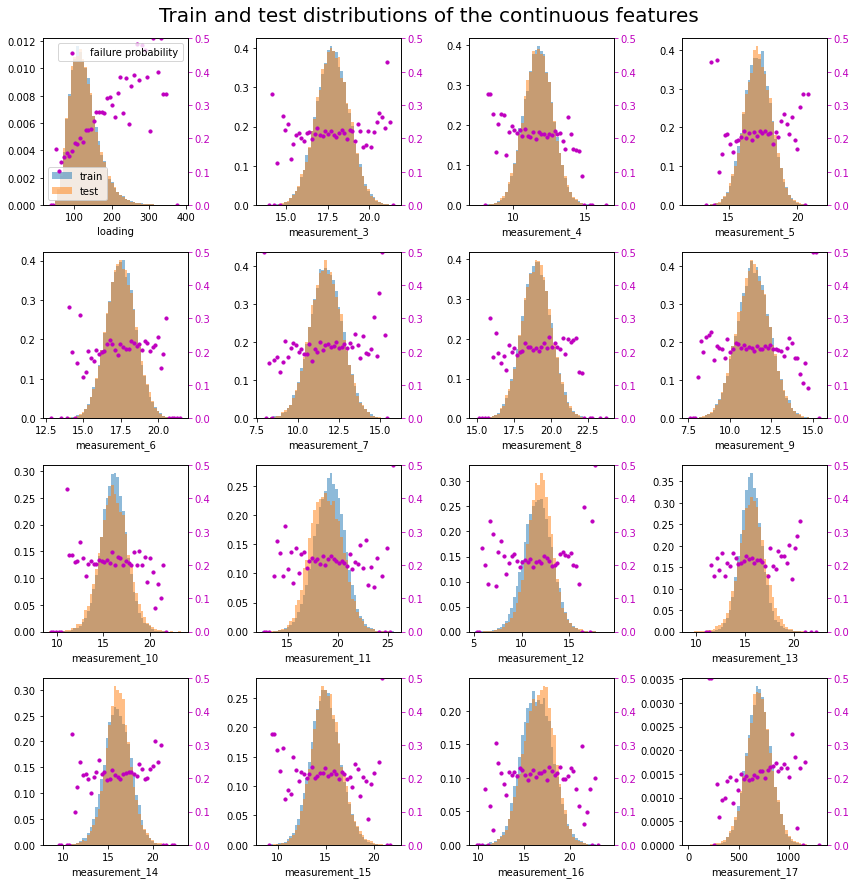

In [59]:
_, axs = plt.subplots(4, 4, figsize=(12,12))

float_cols = [f for f in train_all.columns if train_all[f].dtype == 'float64']

for f, ax in zip(float_cols, axs.ravel()):
    mi = min(train_all[f].min(), test_all[f].min())
    ma = max(train_all[f].max(), test_all[f].max())
    bins = np.linspace(mi, ma, 50)
    ax.hist(train_all[f], bins=bins, alpha=0.5, density=True, label='train')
    ax.hist(test_all[f], bins=bins, alpha=0.5, density=True, label='test')
    ax.set_xlabel(f)
    if ax == axs[0, 0]: ax.legend(loc='lower left')
        
    ax2 = ax.twinx()
    total, _ = np.histogram(train_all[f], bins=bins)
    failures, _ = np.histogram(train_all[f][train_all.failure == 1], bins=bins)
    with warnings.catch_warnings(): # ignore divide by zero for empty bins
        warnings.filterwarnings('ignore', category=RuntimeWarning)
        ax2.scatter((bins[1:] + bins[:-1]) / 2, failures / total,
                    color='m', s=10, label='failure probability')
    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if ax == axs[0, 0]: ax2.legend(loc='upper right')
plt.tight_layout(w_pad=1)
plt.suptitle('Train and test distributions of the continuous features', fontsize=20, y=1.02)
plt.show()


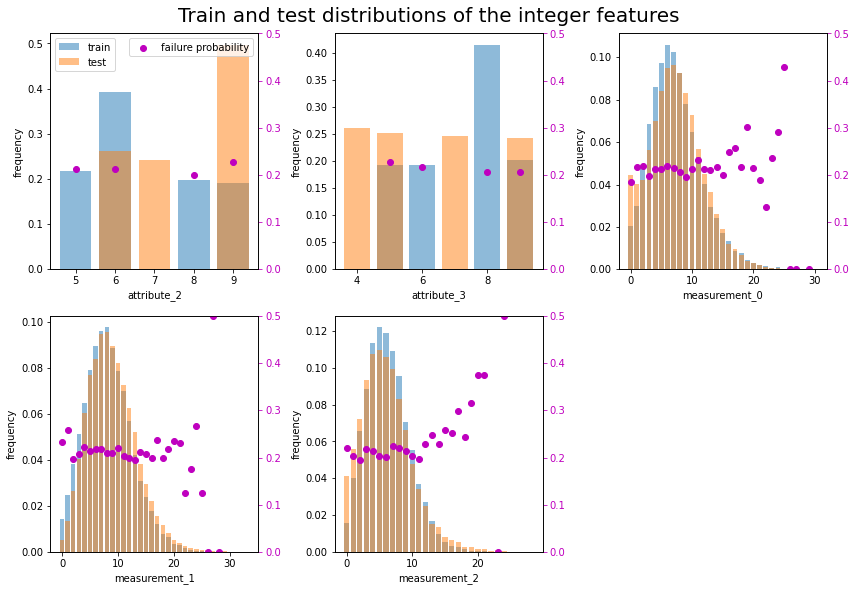

In [31]:
_, axs = plt.subplots(2, 3, figsize=(12, 8))

int_cols = [f for f in train_all.columns if train_all[f].dtype == 'int64' and f != 'failure']

for f, ax in zip(int_cols, axs.ravel()):
    temp1 = train_all.failure.groupby(train_all[f]).agg(['mean', 'size'])
    ax.bar(temp1.index, temp1['size'] / len(train_all), alpha=0.5, label='train')
    temp2 = test_all[f].value_counts()
    ax.bar(temp2.index, temp2 / len(test_all), alpha=0.5, label='test')
    ax.set_xlabel(f)
    ax.set_ylabel('frequency')

    ax2 = ax.twinx()
    ax2.scatter(temp1.index, temp1['mean'],
                color='m', label='failure probability')
    ax2.set_ylim(0, 0.5)
    ax2.tick_params(axis='y', colors='m')
    if ax == axs[0, 0]: ax2.legend(loc='upper right')

axs[0, 0].legend()
axs[1, 2].axis('off')
plt.tight_layout(w_pad=1)
plt.suptitle('Train and test distributions of the integer features', fontsize=20, y=1.02)
plt.show()
del temp1, temp2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


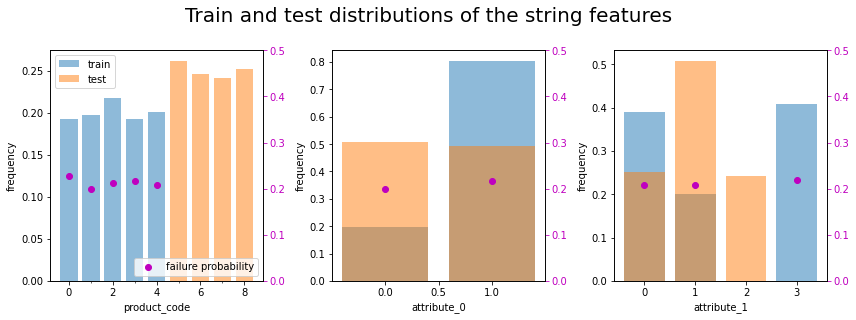

In [38]:
string_cols = [f for f in train_all.columns if train_all[f].dtype == 'object']

_, axs = plt.subplots(1, 3, figsize=(12, 4))
for f, ax in zip(string_cols, axs.ravel()):
    temp1 = train_all[f].value_counts(dropna=False, normalize=True)
    temp2 = test_all[f].value_counts(dropna=False, normalize=True)
    values = sorted(set(temp1.index).union(temp2.index))
    temp1 = temp1.reindex(values)
    temp2 = temp2.reindex(values)
    ax.bar(range(len(values)), temp1, alpha=0.5, label='train')
    ax.bar(range(len(values)), temp2, alpha=0.5, label='test')
    ax.set_xlabel(f)
    ax.set_ylabel('frequency')
    ax.set_xticks(range(len(values)), values)
    
    temp1 = train_all.failure.groupby(train_all[f]).agg(['mean', 'size'])
    temp1 = temp1.reindex(values)
    ax2 = ax.twinx()
    ax2.scatter(range(len(values)), temp1['mean'],
                color='m', label='failure probability')
    ax2.tick_params(axis='y', colors='m')
    ax2.set_ylim(0, 0.5)
    if ax == axs[0]: ax2.legend(loc='lower right')

axs[0].legend()
plt.suptitle('Train and test distributions of the string features', fontsize=20, y=1.1)
plt.tight_layout(w_pad=1)
plt.show()
del temp1, temp2   

## 欠損値を予測する相関を分析する

/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


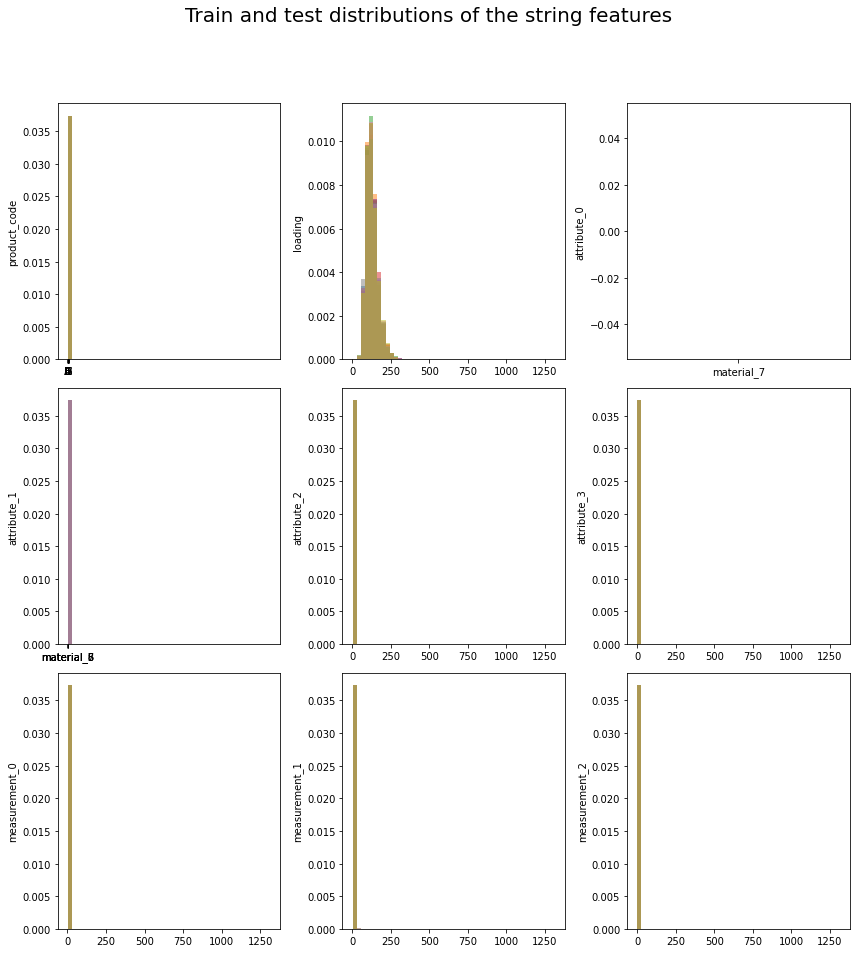

In [61]:


product_codes = all_data['product_code'].unique()
product_codes

_, axs = plt.subplots(3, 3, figsize=(12, 12))

loading = 'loading'


for f, ax in zip(all_data.columns, axs.ravel()):
  tmp = all_data.loc[all_data.product_code == f]
  # ax.hist(tmp[loading], bins=bins, alpha=0.5, density=True, label=f)
  for code in product_codes:
    if code != f:
      mp = all_data.loc[all_data.product_code == code]
      ax.hist(mp[f], bins=bins, alpha=0.5, density=True, label=code)

  ax.set_ylabel(f)

plt.suptitle('Train and test distributions of the string features', fontsize=20, y=1.1)
plt.tight_layout(w_pad=1)
plt.show()
    

# 前処理

In [ ]:
# カテゴリ変数を数値変数に変換
train_data = pd.get_dummies(train_data)
train_data.info()
# test_all = pd.get_dummies(test_all)

# full_dataset = pd.concat([train_X, test_all])
# full_dataset = pd.get_dummies(full_dataset)
# train_X = full_dataset.iloc[train_X.index]
# test_all = full_dataset.iloc[test_all.index]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21256 entries, 4031 to 23654
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      21256 non-null  int64  
 1   loading                 21256 non-null  float64
 2   attribute_2             21256 non-null  int64  
 3   attribute_3             21256 non-null  int64  
 4   measurement_0           21256 non-null  int64  
 5   measurement_1           21256 non-null  int64  
 6   measurement_2           21256 non-null  int64  
 7   measurement_3           21256 non-null  float64
 8   measurement_4           21256 non-null  float64
 9   failure                 21256 non-null  int64  
 10  product_code_A          21256 non-null  uint8  
 11  product_code_B          21256 non-null  uint8  
 12  product_code_C          21256 non-null  uint8  
 13  product_code_D          21256 non-null  uint8  
 14  product_code_E          21256 non-n

In [ ]:
valid_data = pd.get_dummies(valid_data)
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 24141 to 21844
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5314 non-null   int64  
 1   loading                 5271 non-null   float64
 2   attribute_2             5314 non-null   int64  
 3   attribute_3             5314 non-null   int64  
 4   measurement_0           5314 non-null   int64  
 5   measurement_1           5314 non-null   int64  
 6   measurement_2           5314 non-null   int64  
 7   measurement_3           5226 non-null   float64
 8   measurement_4           5215 non-null   float64
 9   measurement_5           5177 non-null   float64
 10  measurement_6           5145 non-null   float64
 11  measurement_7           5115 non-null   float64
 12  measurement_8           5118 non-null   float64
 13  measurement_9           5059 non-null   float64
 14  measurement_10          5056 non-nu

In [ ]:
for col in train_data.columns:
  if not col in valid_data.columns:
    print(col + 'という列は存在しません')
    valid_data[col] = 0
valid_data = valid_data[train_data.columns]
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5314 entries, 24141 to 21844
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5314 non-null   int64  
 1   loading                 5271 non-null   float64
 2   attribute_2             5314 non-null   int64  
 3   attribute_3             5314 non-null   int64  
 4   measurement_0           5314 non-null   int64  
 5   measurement_1           5314 non-null   int64  
 6   measurement_2           5314 non-null   int64  
 7   measurement_3           5226 non-null   float64
 8   measurement_4           5215 non-null   float64
 9   failure                 5314 non-null   int64  
 10  product_code_A          5314 non-null   uint8  
 11  product_code_B          5314 non-null   uint8  
 12  product_code_C          5314 non-null   uint8  
 13  product_code_D          5314 non-null   uint8  
 14  product_code_E          5314 non-nu

In [ ]:
for col in train_data.columns:
  if not col in test_all.columns:
    print(col + 'という列は存在しません')
    test_all[col] = 0
test_all = test_all[train_data.columns]
test_all.info()

failureという列は存在しません
product_code_Aという列は存在しません
product_code_Bという列は存在しません
product_code_Cという列は存在しません
product_code_Dという列は存在しません
product_code_Eという列は存在しません
attribute_0_material_5という列は存在しません
attribute_0_material_7という列は存在しません
attribute_1_material_5という列は存在しません
attribute_1_material_6という列は存在しません
attribute_1_material_8という列は存在しません
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20775 entries, 0 to 20774
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      20775 non-null  int64  
 1   loading                 20552 non-null  float64
 2   attribute_2             20775 non-null  int64  
 3   attribute_3             20775 non-null  int64  
 4   measurement_0           20775 non-null  int64  
 5   measurement_1           20775 non-null  int64  
 6   measurement_2           20775 non-null  int64  
 7   measurement_3           20446 non-null  float64
 8   measurement_4           20366 non-nul

In [ ]:
train_data = train_data.drop(["id"], axis=1)
valid_data = valid_data.drop(["id"], axis=1)
test_all = test_all.drop(["id", "failure"], axis=1)

In [ ]:
train_X, train_y = train_data.drop(['failure'], axis=1), train_data['failure']
valid_X, valid_y = valid_data.drop(['failure'], axis=1), valid_data['failure']
len(train_y)

21256

In [ ]:
len(train_X)

21256

In [ ]:
len(test_all)

20775

In [ ]:

for col in valid_X.columns:
  if valid_X[col].dtype == 'object':
    valid_X[col].fillna(train_data[col].mode(), inplace=True)
  elif valid_X[col].dtype == 'str':
    valid_X[col].fillna(train_data[col].mode(), inplace=True)
  else:
    valid_X[col].fillna(train_data[col].mean(), inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score
lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)

lr_svg = LinearSVC()
lr_svg.fit(train_X, train_y)

svg = SVC()
svg.fit(train_X, train_y)

rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

knc = KNeighborsClassifier()
knc.fit(train_X, train_y)

sdg = SGDClassifier()
sdg.fit(train_X, train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


SGDClassifier()

In [ ]:
predictions = lr_model.predict(valid_X)

score = lr_model.score(valid_X, valid_y)
score

0.8009032743695897

In [ ]:
predictions = lr_svg.predict(valid_X)

score = lr_svg.score(valid_X, valid_y)
score

0.801091456529921

In [ ]:
predictions = svg.predict(valid_X)

score = svg.score(valid_X, valid_y)
score

0.801091456529921

In [ ]:
predictions = knc.predict(valid_X)

score = knc.score(valid_X, valid_y)
score

0.7578095596537449

In [ ]:
predictions = rfc.predict(valid_X)

score = rfc.score(valid_X, valid_y)
score

0.7939405344373354

In [ ]:
predictions = sdg.predict(valid_X)

score = sdg.score(valid_X, valid_y)
score

0.801091456529921

In [ ]:
for col in test_all.columns:
  if test_all[col].dtype == 'category':
    test_all[col] = train_X[col].mode()
  else:
    test_all[col] = train_X[col].mean()

In [ ]:
y_pred = sdg.predict(test_all)


In [ ]:
prediction = pd.DataFrame(y_pred, columns=['failure'])

prediction["id"] = pd.read_csv('./test.csv')["id"]

prediction.to_csv("./submit.csv", index=False, header=True)

In [ ]:
len(prediction)

20775